In [3]:
from __future__ import division
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

# Show Functions

In [4]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(5, 5))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
def show_mask(mask):
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')
def overlay_mask(mask, image):
    plt.figure(figsize=(5, 5))
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [20]:
#Testing Datasets
import os

In [44]:
rootDir = "N:/RiceDetectionGithub/New folder/RiceDiseaseDtection_bdFarmer/Test Pictures"

images = []
for i,c in enumerate(os.listdir(rootDir)):
    images.append(c)
images

['0c865fa4-b0bf-4e69-b39a-d97b068cef84___RS_Erly.B 7477.JPG',
 '0cbfa4fa-63d8-43ce-9385-ff140e524b69___FREC_Scab 3164.JPG',
 '0cd17aff-13d8-439a-ac08-dae1aea55edb___RS_Erly.B 7828.JPG',
 '0e39c18a-9e04-4f6b-b557-dc0e944d22e5___RS_Erly.B 9501.JPG',
 '0ecc2ee7-fb66-41fa-a23b-9bdeaf31078a___RS_Erly.B 6381.JPG',
 '0efaac13-1988-48db-aec3-f31df3045b95___RS_Erly.B 8342.JPG',
 '1a304331-98b5-473f-bbb1-c33b8441052a___FREC_Scab 3296.JPG',
 '1a4047d7-23d6-4bba-ba10-b6e7005ea01b___FREC_Scab 3193.JPG',
 '1a41bab0-45e0-4dda-a798-9bf4a998f1b6___FREC_Scab 3450.JPG',
 '1ceeeee0-40bd-4ac9-8a57-59385bf5df8a___FREC_Scab 3001.JPG',
 '1d81b4c1-072d-4cf7-b1ca-ce43f59822d8___FREC_Scab 3406.JPG',
 '55704747_342128439747195_3459435413481979904_n.jpg',
 '55789981_399634424188576_12784382473404416_n.jpg',
 '55811488_2374512969456285_7360698618124173312_n.jpg',
 '55892513_1322955544549647_5542132769766768640_n.jpg',
 '56255538_415767079182433_6135170141622632448_n.jpg',
 '56369799_413115149236338_2489372012653314

In [45]:
%matplotlib inline

# Function Full

In [46]:

def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    im2,contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print (len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

In [83]:
def DetectLeaf(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(265,256))
    # Convert from RGB to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # Blur image slightly
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

    # 0-10 hue
    min_red = np.array([36,0,0])
    max_red = np.array([86,255,255])
    image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

    # 170-180 hue
    min_red2 = np.array([12, 20, 30])
    max_red2 = np.array([86, 100, 100])
    image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

    # 170-180 hue
    min_red3 = np.array([30, 80, 60])
    max_red3 = np.array([80, 255, 255])
    image_red3 = cv2.inRange(image_blur_hsv, min_red3, max_red3)
    
#     lower_green = np.array([36,0,0])
#     upper_green = np.array([86,255,255])

#     mask = cv2.inRange(image, lower_green, upper_green)
#     res = cv2.bitwise_and(image,image, mask= mask)

#     show_mask(image_red1)
#     show_mask(image_red2)
#     show_mask(image_red3)
#     show_mask(mask)
#     show_mask(res)

    image_red = image_red1 + image_red2 + image_red3
    # 	show_mask(image_red)

    # Clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))


    # Fill small gaps
    image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
    # 	show_mask(image_red_closed)

    # Remove specks
    image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
    # 	show_mask(image_red_closed_then_opened)

    #Find largest contour
    big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
    # show_mask(red_mask)

    #Show overlay image
    # 	overlay_mask(red_mask, image)

    # Bounding ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(big_contour)
    cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
    show(image_with_ellipse)

    # 	print("Big contour:", big_contour.size)

    return big_contour.size

1
568
1
462
1
662
1
750
2
770
6
422
1
504
1
568
1
486
1
620
1
562
7
372
3
158
2
456
2
108
2
292
6
310
5
140
6
182
3
504
2
116


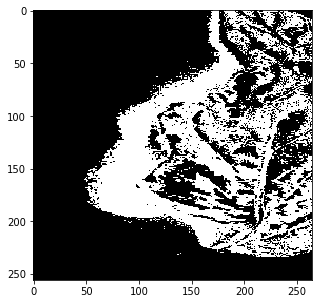

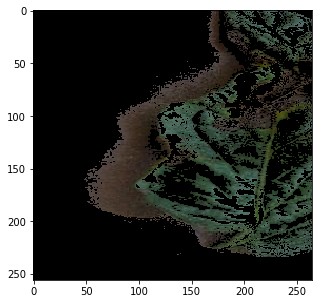

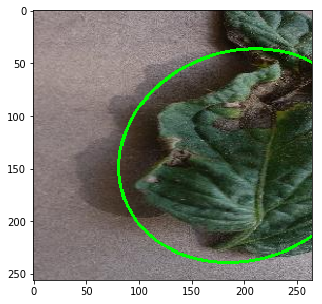

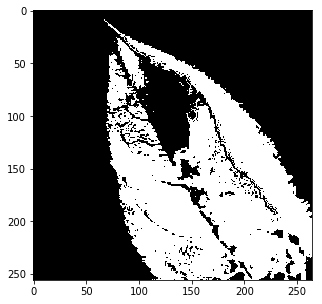

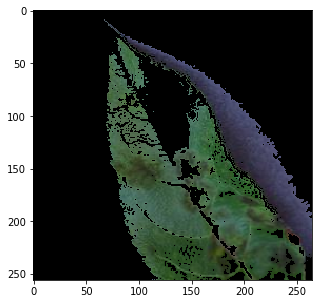

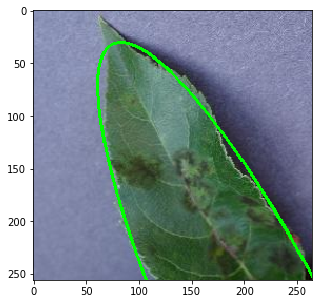

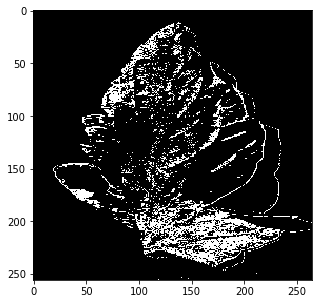

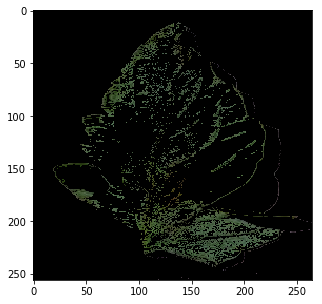

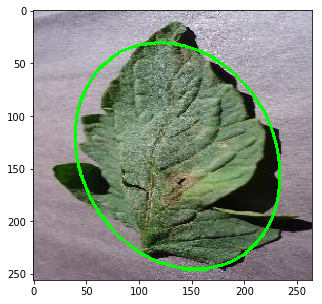

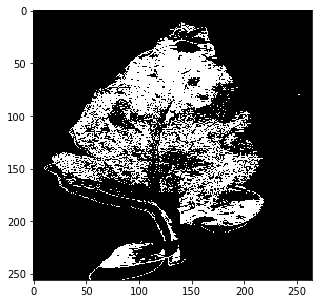

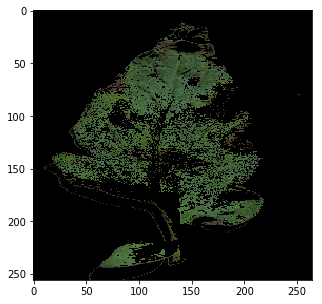

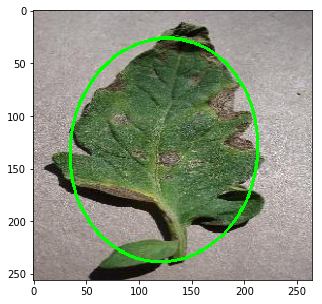

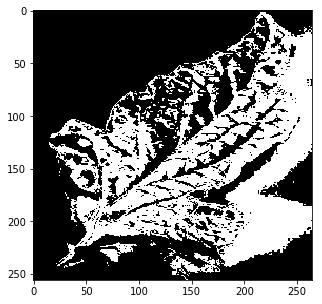

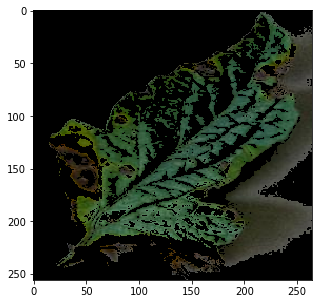

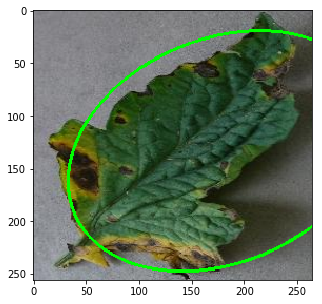

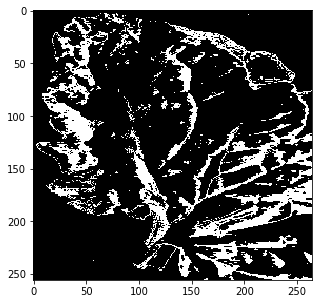

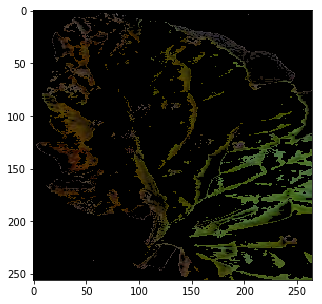

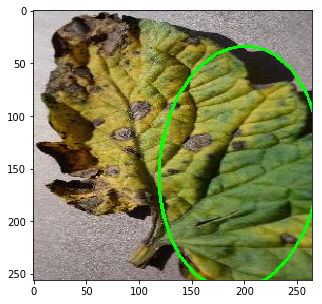

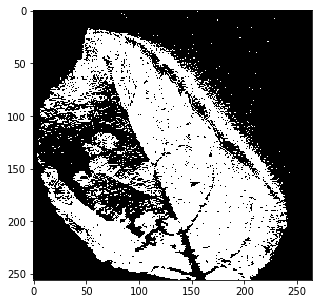

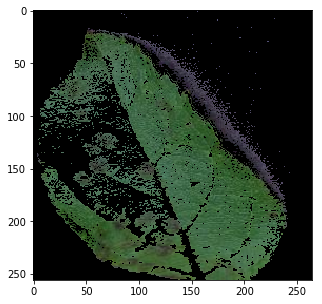

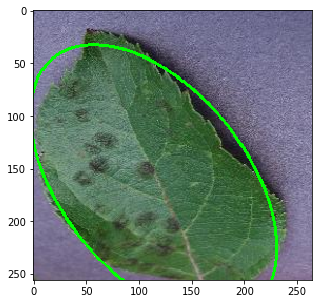

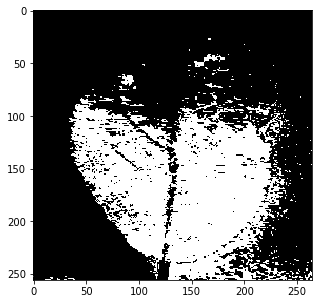

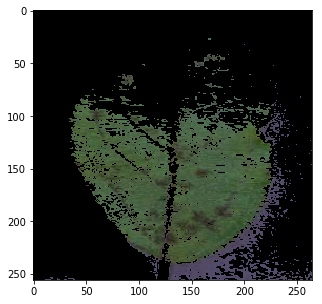

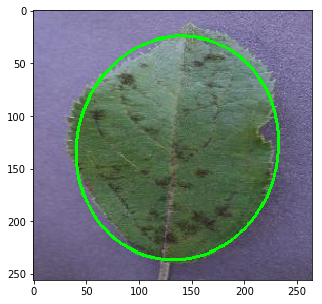

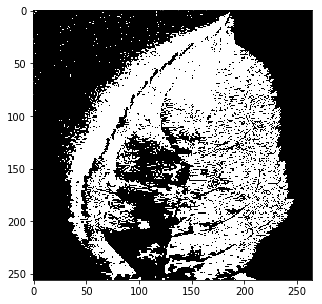

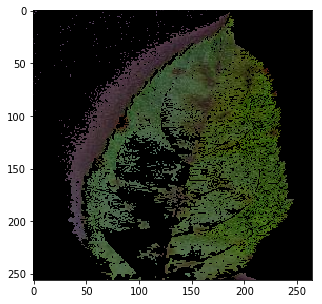

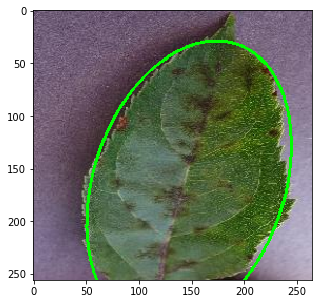

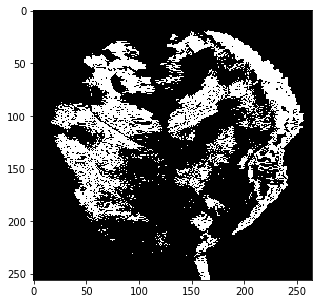

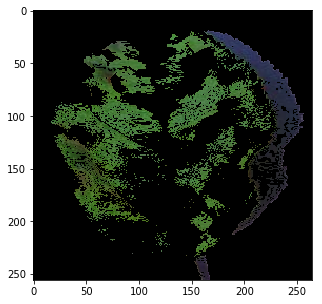

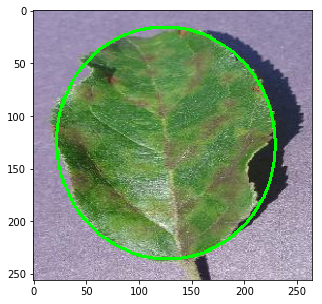

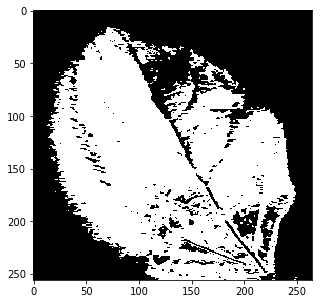

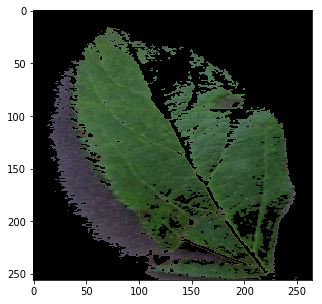

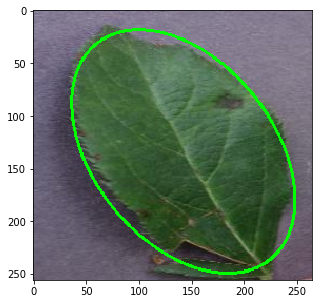

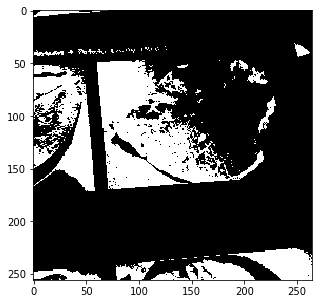

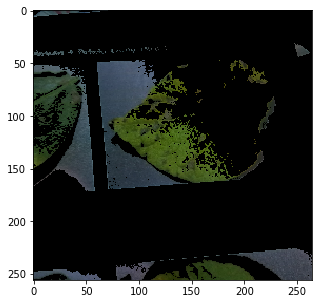

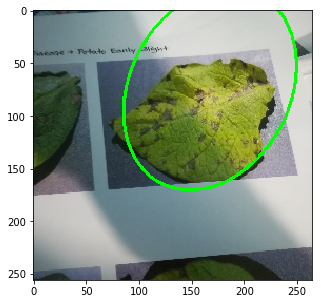

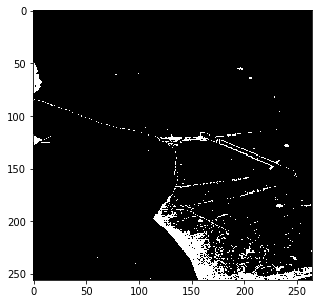

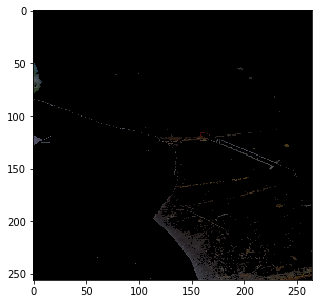

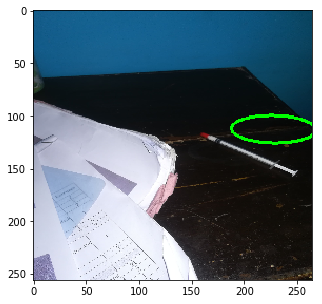

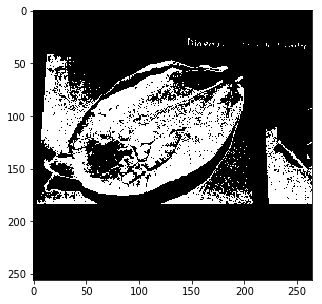

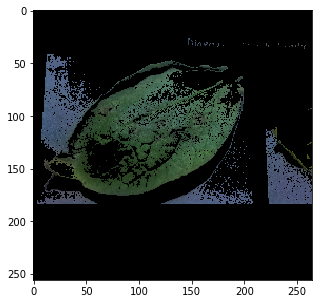

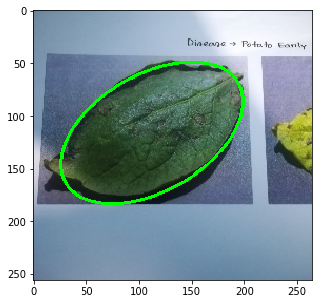

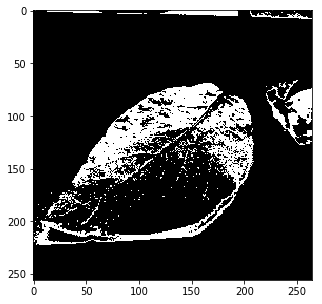

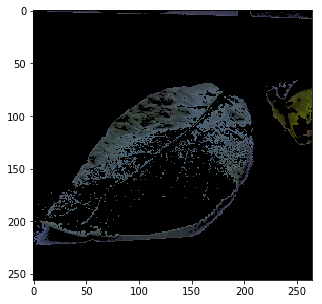

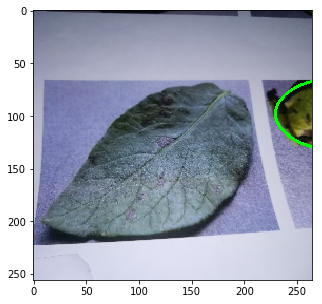

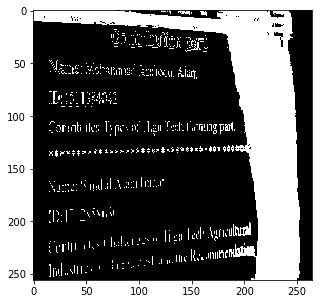

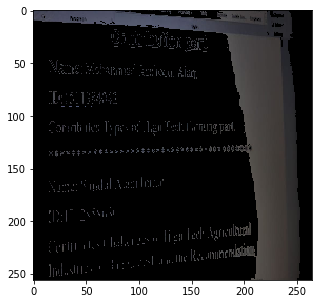

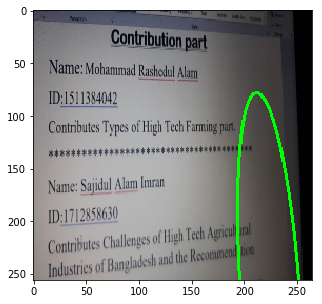

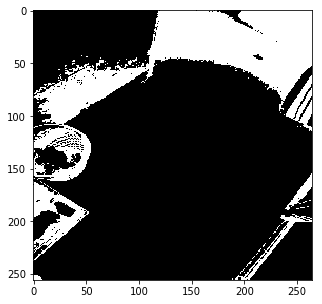

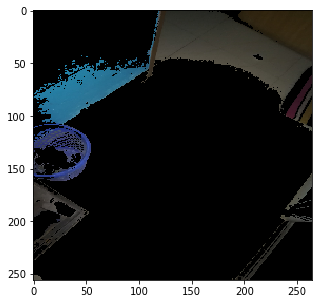

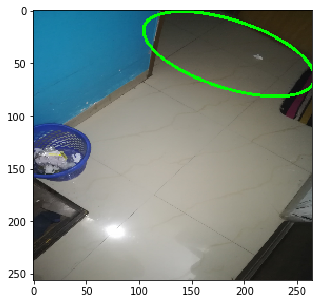

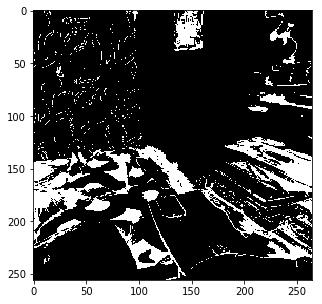

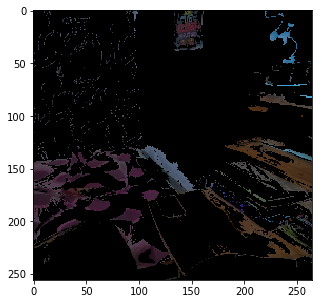

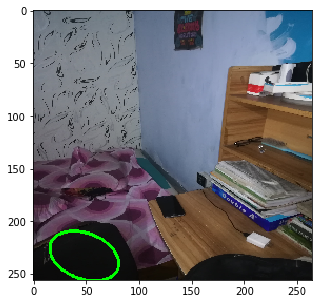

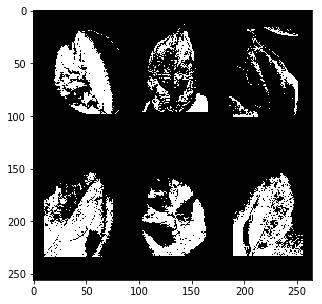

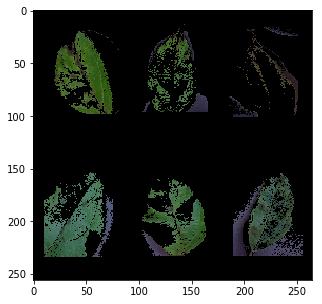

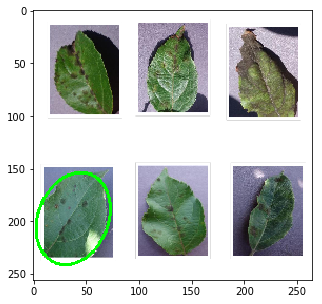

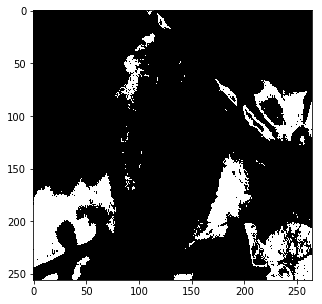

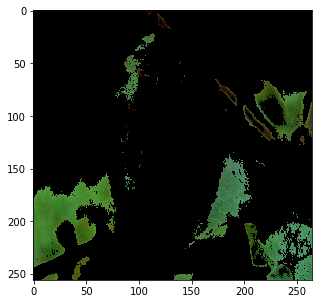

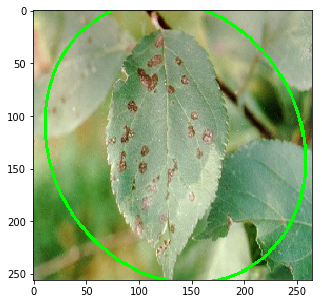

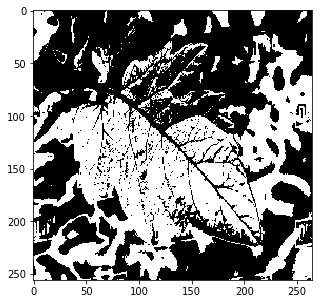

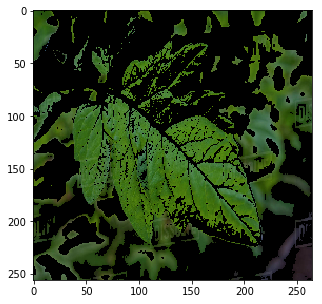

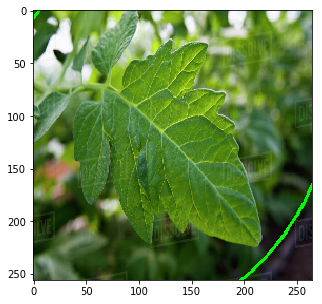

In [84]:
plt.close('all')
for img in images:
    img= cv2.imread(rootDir+'/'+img)
#     print(img.shape)
    s = DetectLeaf(img)
    print(s)
    
    

## Read and process image

In [82]:
plt.close('all')

In [29]:
# image = cv2.imread("N:/RiceDetectionGithub/Custom-Train-Test(color)/color/Grape___Esca_(Black_Measles)/0de65785-c601-41dc-8099-83c73cac21c2___FAM_B.Msls 4094.JPG")
image = cv2.imread("N:/RiceDetectionGithub/Custom-Train-Test(color)/color/Apple___Apple_scab/0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131.JPG")

In [58]:
image.shape

(256, 256, 3)

In [59]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(265,256))


In [60]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


In [61]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)

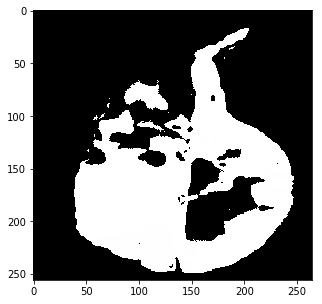

In [62]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([36,0,0])
max_red = np.array([86,255,255])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([12, 20, 30])
max_red2 = np.array([86, 100, 100])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

# show_mask(image_red1)
# show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

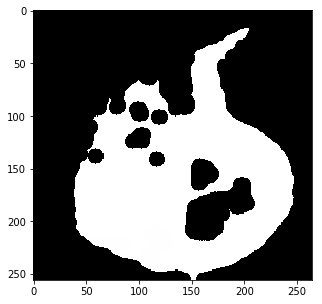

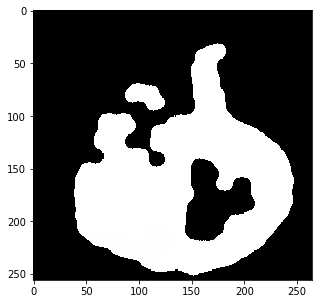

In [63]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

In [32]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    im2,contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print (len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
# show_mask(red_mask)

NameError: name 'image_red_closed_then_opened' is not defined

<Figure size 360x360 with 0 Axes>

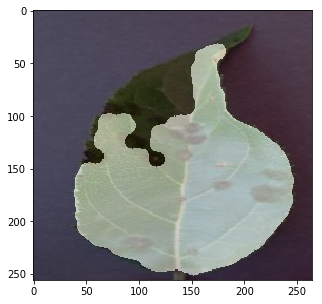

In [65]:
overlay_mask(red_mask, image)

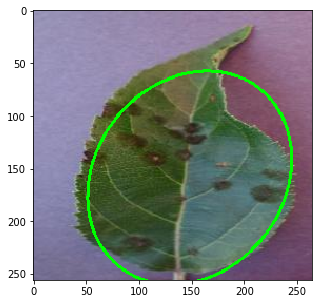

In [66]:
# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

In [67]:
big_contour.size

736